In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta


In [3]:
# Data: https://www.ausgrid.com.au/Industry/Our-Research/Data-to-share/Solar-home-electricity-data
raw_data = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/raw/Solar home half-hour data - 1 July 2012 to 30 June 2013/2012-2013 Solar home electricity data v2.csv")
raw_data

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,29/06/2013,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,NaN
268553,300,3.36,2086,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
268554,300,3.36,2086,CL,30/06/2013,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,NaN
268555,300,3.36,2086,GC,30/06/2013,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,NaN


In [4]:
print(raw_data.groupby("Customer")['date'].max())
print(raw_data.groupby("Customer")['date'].min())

Customer
1      9/12/2012
2      9/10/2012
3      9/12/2012
4      9/12/2012
5      9/12/2012
         ...    
296    9/12/2012
297    9/12/2012
298    9/12/2012
299    9/12/2012
300    9/12/2012
Name: date, Length: 300, dtype: object
Customer
1      1/01/2013
2      1/01/2013
3      1/01/2013
4      1/01/2013
5      1/01/2013
         ...    
296    1/01/2013
297    1/01/2013
298    1/01/2013
299    1/01/2013
300    1/01/2013
Name: date, Length: 300, dtype: object


In [5]:
explore_raw_data = raw_data.copy()
explore_raw_data['datetime'] = pd.to_datetime(explore_raw_data['date'])

In [6]:
for customer, data in explore_raw_data.sort_values(["Customer","datetime"]).groupby('Customer'):
    deltas = data['datetime'].diff()
    gaps = deltas[deltas > timedelta(days=1)]
    gaps
    print("Customer: {}".format(customer))
    print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')

    for i, g in gaps.iteritems():
        gap_start = explore_raw_data['datetime'][i - 1]
        print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
              f'Duration: {str(g.to_pytimedelta())}')

Customer: 1
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00


Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 24
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00

Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 41
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00

Customer: 55
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00

Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 67
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:

Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Dura

Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 87
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:

Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 98
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00

Customer: 107
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

Customer: 126
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 144
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:0

22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-

Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 169
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:0

Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 179
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:0

Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 190
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00

Customer: 202
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 221
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:0

22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-

Customer: 245
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 255
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:0

Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:00
Start: 2013-10-01 | Duration: 26 days, 0:00:00
Start: 2013-11-01 | Duration: 25 days, 0:00:00
Customer: 268
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00

Customer: 281
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

Customer: 290
22 gaps with average gap duration: 16 days 05:27:16.363636
Start: 2012-01-07 | Duration: 26 days, 0:00:00
Start: 2012-02-07 | Duration: 24 days, 0:00:00
Start: 2012-03-07 | Duration: 26 days, 0:00:00
Start: 2012-04-07 | Duration: 25 days, 0:00:00
Start: 2012-05-07 | Duration: 26 days, 0:00:00
Start: 2012-06-07 | Duration: 25 days, 0:00:00
Start: 2012-07-07 | Duration: 7 days, 0:00:00
Start: 2012-08-07 | Duration: 7 days, 0:00:00
Start: 2012-09-07 | Duration: 7 days, 0:00:00
Start: 2012-10-07 | Duration: 7 days, 0:00:00
Start: 2012-11-07 | Duration: 7 days, 0:00:00
Start: 2013-12-01 | Duration: 7 days, 0:00:00
Start: 2013-12-02 | Duration: 7 days, 0:00:00
Start: 2013-12-03 | Duration: 7 days, 0:00:00
Start: 2013-12-04 | Duration: 7 days, 0:00:00
Start: 2013-12-05 | Duration: 7 days, 0:00:00
Start: 2013-12-06 | Duration: 7 days, 0:00:00
Start: 2013-07-01 | Duration: 26 days, 0:00:00
Start: 2013-08-01 | Duration: 26 days, 0:00:00
Start: 2013-09-01 | Duration: 25 days, 0:00:0

In [7]:
customer_1 = raw_data[raw_data.Customer == 1]
customer_1

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1,3.78,2076,GC,29/06/2013,0.597,0.526,0.594,0.124,0.176,...,0.182,0.279,0.191,0.436,0.445,0.086,0.145,0.634,0.100,NaN
1091,1,3.78,2076,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
1092,1,3.78,2076,CL,30/06/2013,1.250,1.238,1.250,1.263,0.163,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.056,NaN
1093,1,3.78,2076,GC,30/06/2013,0.031,0.111,0.031,0.109,0.030,...,0.213,0.243,0.190,0.260,0.274,0.509,0.166,0.861,0.631,NaN


In [8]:
customer_1 = customer_1.drop(columns=["Row Quality"])

In [9]:
customer_1_long = pd.melt(customer_1, id_vars=["Customer", "Generator Capacity",'Postcode','Consumption Category',"date"], var_name="time",value_name="consumption")
customer_1_long

,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption
0,1,3.78,2076,CL,1/07/2012,0:30,1.250
1,1,3.78,2076,GC,1/07/2012,0:30,0.855
2,1,3.78,2076,GG,1/07/2012,0:30,0.000
3,1,3.78,2076,CL,2/07/2012,0:30,1.250
4,1,3.78,2076,GC,2/07/2012,0:30,0.309
...,...,...,...,...,...,...,...
52555,1,3.78,2076,GC,29/06/2013,0:00,0.100
52556,1,3.78,2076,GG,29/06/2013,0:00,0.000
52557,1,3.78,2076,CL,30/06/2013,0:00,1.056
52558,1,3.78,2076,GC,30/06/2013,0:00,0.631


In [10]:
customer_1_long["datetime"] = customer_1_long["date"] + " " + customer_1_long["time"]
customer_1_long["datetime"] = pd.to_datetime(customer_1_long.datetime)
customer_1_long = customer_1_long

In [11]:
customer_1_long['Consumption Category'] = customer_1_long['Consumption Category'].replace({"CL":"controlled_load_consumption", "GC": "general_electricity_consumption", "GG": "solar_generation"})
customer_1_long

,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime
0,1,3.78,2076,controlled_load_consumption,1/07/2012,0:30,1.250,2012-01-07 00:30:00
1,1,3.78,2076,general_electricity_consumption,1/07/2012,0:30,0.855,2012-01-07 00:30:00
2,1,3.78,2076,solar_generation,1/07/2012,0:30,0.000,2012-01-07 00:30:00
3,1,3.78,2076,controlled_load_consumption,2/07/2012,0:30,1.250,2012-02-07 00:30:00
4,1,3.78,2076,general_electricity_consumption,2/07/2012,0:30,0.309,2012-02-07 00:30:00
...,...,...,...,...,...,...,...,...
52555,1,3.78,2076,general_electricity_consumption,29/06/2013,0:00,0.100,2013-06-29 00:00:00
52556,1,3.78,2076,solar_generation,29/06/2013,0:00,0.000,2013-06-29 00:00:00
52557,1,3.78,2076,controlled_load_consumption,30/06/2013,0:00,1.056,2013-06-30 00:00:00
52558,1,3.78,2076,general_electricity_consumption,30/06/2013,0:00,0.631,2013-06-30 00:00:00


In [12]:
customer_1_long[customer_1_long.datetime > "2012-01-18 00:30:00"].sort_values("datetime")

,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime
51468,1,3.78,2076,controlled_load_consumption,2/07/2012,0:00,1.069,2012-02-07 00:00:00
51469,1,3.78,2076,general_electricity_consumption,2/07/2012,0:00,0.067,2012-02-07 00:00:00
51470,1,3.78,2076,solar_generation,2/07/2012,0:00,0.000,2012-02-07 00:00:00
3,1,3.78,2076,controlled_load_consumption,2/07/2012,0:30,1.250,2012-02-07 00:30:00
4,1,3.78,2076,general_electricity_consumption,2/07/2012,0:30,0.309,2012-02-07 00:30:00
...,...,...,...,...,...,...,...,...
50314,1,3.78,2076,general_electricity_consumption,12/06/2013,23:00,0.240,2013-12-06 23:00:00
50313,1,3.78,2076,controlled_load_consumption,12/06/2013,23:00,0.000,2013-12-06 23:00:00
51408,1,3.78,2076,controlled_load_consumption,12/06/2013,23:30,0.000,2013-12-06 23:30:00
51409,1,3.78,2076,general_electricity_consumption,12/06/2013,23:30,0.728,2013-12-06 23:30:00


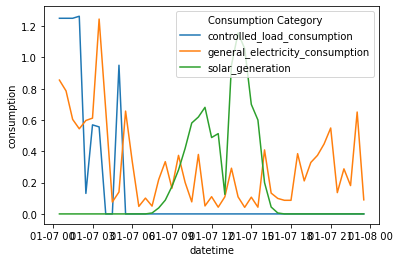

In [13]:
sns.lineplot(data=customer_1_long[(customer_1_long.datetime>"2012-01-07") & (customer_1_long.datetime<"2012-01-08")], x="datetime", y="consumption", hue="Consumption Category")

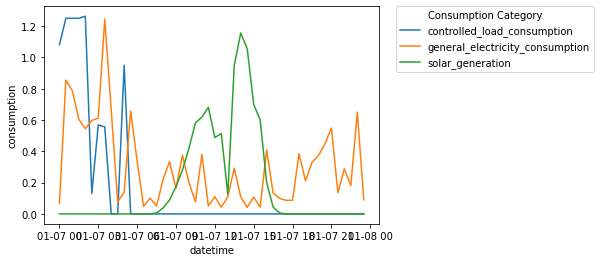

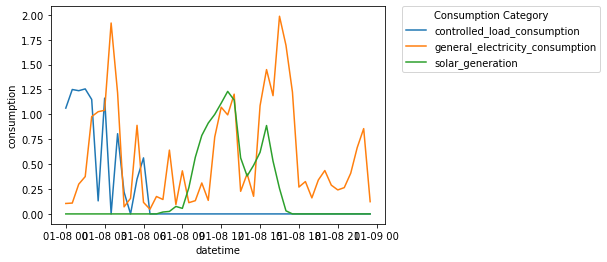

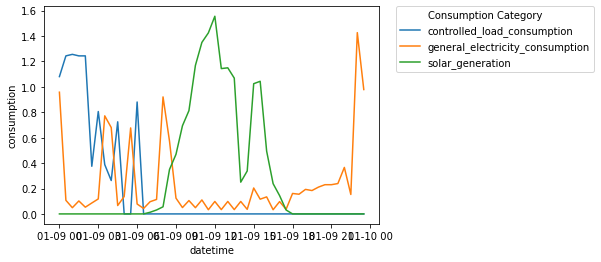

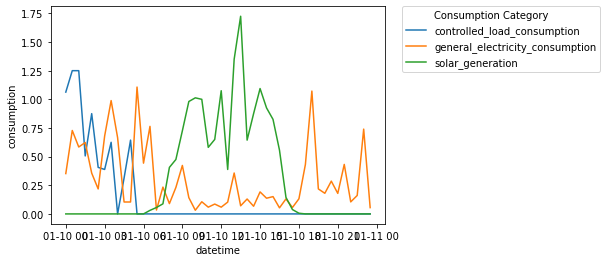

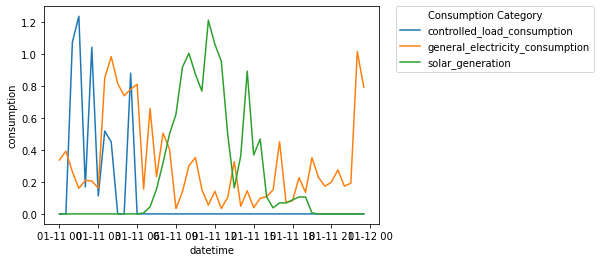

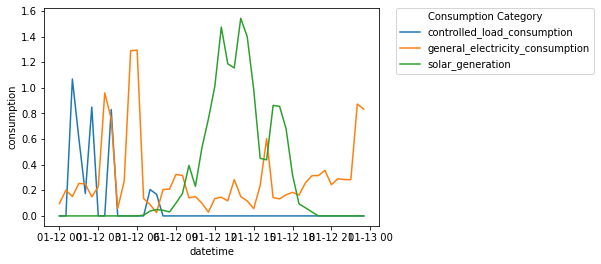

In [14]:
for day, data in customer_1_long[customer_1_long.datetime<"2012-02-01"].groupby("date"):
    sns.lineplot(data=data, x="datetime", y="consumption", hue="Consumption Category")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    plt.close()

In [15]:
testing_dat = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/lagged_2012-2013-solar-electricity-data.csv")
testing_dat[(testing_dat["Consumption Category"] == "solar_generation") & (testing_dat['datetime']>'2012-01-12 20:00:00')].sort_values("datetime").head(50)


,Unnamed: 0,Unnamed: 0.1,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime,...,lag_29,lag_30,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49
698,384941,10742741,1,3.78,2076,solar_generation,1/12/2012,20:30,0.0,2012-01-12 20:30:00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94154,386888,10744688,3,1.00,2263,solar_generation,1/12/2012,20:30,0.0,2012-01-12 20:30:00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146714,387983,10745783,4,1.00,2220,solar_generation,1/12/2012,20:30,0.0,2012-01-12 20:30:00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,394553,11011298,1,3.78,2076,solar_generation,1/12/2012,21:00,0.0,2012-01-12 21:00:00,...,0.006,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94157,396500,11013245,3,1.00,2263,solar_generation,1/12/2012,21:00,0.0,2012-01-12 21:00:00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146717,397595,11014340,4,1.00,2220,solar_generation,1/12/2012,21:00,0.0,2012-01-12 21:00:00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,404165,11279855,1,3.78,2076,solar_generation,1/12/2012,21:30,0.0,2012-01-12 21:30:00,...,0.038,0.006,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146720,407207,11282897,4,1.00,2220,solar_generation,1/12/2012,21:30,0.0,2012-01-12 21:30:00,...,0.013,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94160,406112,11281802,3,1.00,2263,solar_generation,1/12/2012,21:30,0.0,2012-01-12 21:30:00,...,0.006,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
707,413777,11548412,1,3.78,2076,solar_generation,1/12/2012,22:00,0.0,2012-01-12 22:00:00,...,0.050,0.038,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:

raw_data_long = pd.melt(raw_data, id_vars=["Customer", "Generator Capacity",'Postcode','Consumption Category',"date"], var_name="time",value_name="consumption")
raw_data_long

mean_cl = raw_data_long[raw_data_long['Consumption Category']=='CL'].groupby("time").mean().reset_index()
mean_cl[mean_cl.consumption > 0.1]

,time,Customer,Generator Capacity,Postcode,consumption
0,0:00,147.016975,1.598101,2223.328164,0.387839
1,0:30,147.016975,1.598101,2223.328164,0.487205
22,1:00,147.016975,1.598101,2223.328164,0.510854
23,1:30,147.016975,1.598101,2223.328164,0.487822
29,22:30,147.016975,1.598101,2223.328164,0.112686
30,23:00,147.016975,1.598101,2223.328164,0.143401
31,23:30,147.016975,1.598101,2223.328164,0.255525
32,2:00,147.016975,1.598101,2223.328164,0.345980
33,2:30,147.016975,1.598101,2223.328164,0.231427
34,3:00,147.016975,1.598101,2223.328164,0.130452


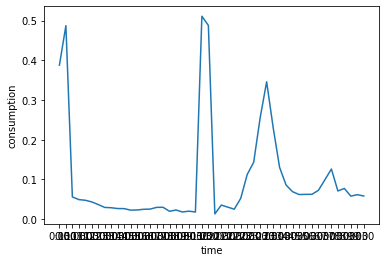

In [34]:
sns.lineplot(data=mean_cl, x="time",y="consumption")